# MSCA 31013 BIG DATA PLATFORMS FINAL PROJECT
### GARIMA SOHI

## MODULE - 2 (EXPLORATORY DATA ANALYSIS)

#### 2.1 Importing required packages and libraries for setting up the environment

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [2]:
from google.cloud import storage

In [3]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True) 

#### 2.2 Reading the reduced file for project

In [4]:
df_twt_eda = spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/gsohi/bdp_final_project_eda')

In [5]:
df_twt_eda.count()

8350980

In [6]:
df_twt_eda.columns

['user_id',
 'user_name',
 'user_description',
 'user_location',
 'statuses_count',
 'user_verified_status',
 'retweet_user_id',
 'retweet_user_name',
 'retweet_user_description',
 'user_followers_count',
 'place_country',
 'tweet_created_at',
 'is_retweeted',
 'text']

In [7]:
df_twt_eda.limit(5).toPandas()

,user_id,user_name,user_description,user_location,statuses_count,user_verified_status,retweet_user_id,retweet_user_name,retweet_user_description,user_followers_count,place_country,tweet_created_at,is_retweeted,text
0,1506279213145411596,Isaac fan account | STREAM DOTDOTT,compte fan de maximus | She/Her | 23 | haikyuu brainrot | not spoiler free |\nhumain tout à fait fonctionnel | pfp comms by : BetterOniphobia,None,5102,False,1110709463709679616,inkanii 🌸,Hi I draw stuff | 21 | 😷🦊 | DO NOT REPOST | pfp OK with credit,47,None,Sun Sep 25 07:54:06 +0000 2022,RT,smart MSBY Atsumu and struggling college student Kiyoomi\n#haikyuu #sakuatsu https://t.co/dx9ygFwbRL
1,1273842231082803201,달콤,None,None,7660,False,1290203557065416707,Billlie Information 🐈‍⬛,Information for Billlie Member #MoonSua #Suhyeon #Haram #Tsuki #Sheon #Siyoon #Haruna 💜🌝🌸🎀🐰🐱🐣🐢💙,76,None,Sun Sep 25 07:54:06 +0000 2022,RT,Billlie's Schedule‼️\n9/25\n▶️Inkigayo at 3.50PM\n▶️ Fansign Ktown4u Offline at 7PM &amp; Online at 9.30PM\n\n9/27\n▶️ After School Club at 1PM\n▶️ Second World EP5 at 8.50PM 🌝\n\n9/28\n▶️ 2022 Festival Jungbu University at 8.30PM\n\n#빌리 #Billlie
2,1435048419085664265,.,None,None,637,False,1559527150197555200,NewJeans Loops 👖,for #뉴진스 #NewJeans,17,None,Sun Sep 25 07:54:12 +0000 2022,RT,220924 Yonsei University \nHype Boy \n\n#뉴진스 #NewJeans https://t.co/UrZ2I6cAN6
3,1858565390,Jenny Ardley,Love my job (s). Personal account. For Community related posts see @LboroCommunity,Loughborough,9748,False,2641472512,Claire gallerystrong 💥,#Leader aspiring to diversify #nuclear #WINCumbria #NPWAwards #Trustee Royal Society Chemistry #Chemist #Engineer #WeAreNPW #visiblewomen my views only,979,None,Sun Sep 25 07:54:13 +0000 2022,RT,Well look what i found at a university open day. A #WomenInSTEM group for Loughborough Uni. 💕the networks forming to help more gender balance in STEM @lborouniversity @LboroWIS @thewisecampaign @WES1919 https://t.co/HSjurHT99K
4,872599455324815360,JABE🍀,🖤🍀 Trying to postive! Mexican!,You don't need to know this!,158748,False,1452957328517439492,Netflix Anime,#tsudaken stan\n日本語⇨@NetflixJP_Anime\nYouTube: http://youtube.com/c/netflixanime,860,None,Sun Sep 25 07:54:14 +0000 2022,RT,Lookism is coming to Netflix on November 4! \n\nPark Hyung Suk navigates high school life while switching between two very different bodies...\n\n#TUDUM\n#TUDUMjapan\n#Lookism https://t.co/F6ItvhIlwX


#### NOTE : While processing ~8.3 Million Records, I was getting OutOfMemoryError. Therefore, I am taking the maximum threshold allowed here ~2.5 Million Records (which is 30% of the ~8.3 Million rows).

In [5]:
eda = df_twt_eda.sample(fraction=0.3)

In [6]:
eda = eda.toPandas()

22/12/05 23:25:30 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 6 for reason Container marked as failed: container_1670282560566_0001_01_000007 on host: hub-msca-bdp-dphub-students-backup-gsohi-sw-jx59.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/05 23:25:30 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 6 on hub-msca-bdp-dphub-students-backup-gsohi-sw-jx59.c.msca-bdp-students.internal: Container marked as failed: container_1670282560566_0001_01_000007 on host: hub-msca-bdp-dphub-students-backup-gsohi-sw-jx59.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/05 23:25:30 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 8 for reason Container marked as failed: container_1670282560566_0001_01_000009 on host: 

#### 2.3 Checking for the distribution of null values in the dataset

In [7]:
null_values = eda.isna().sum()

Text(0.5, 0, 'total null values')

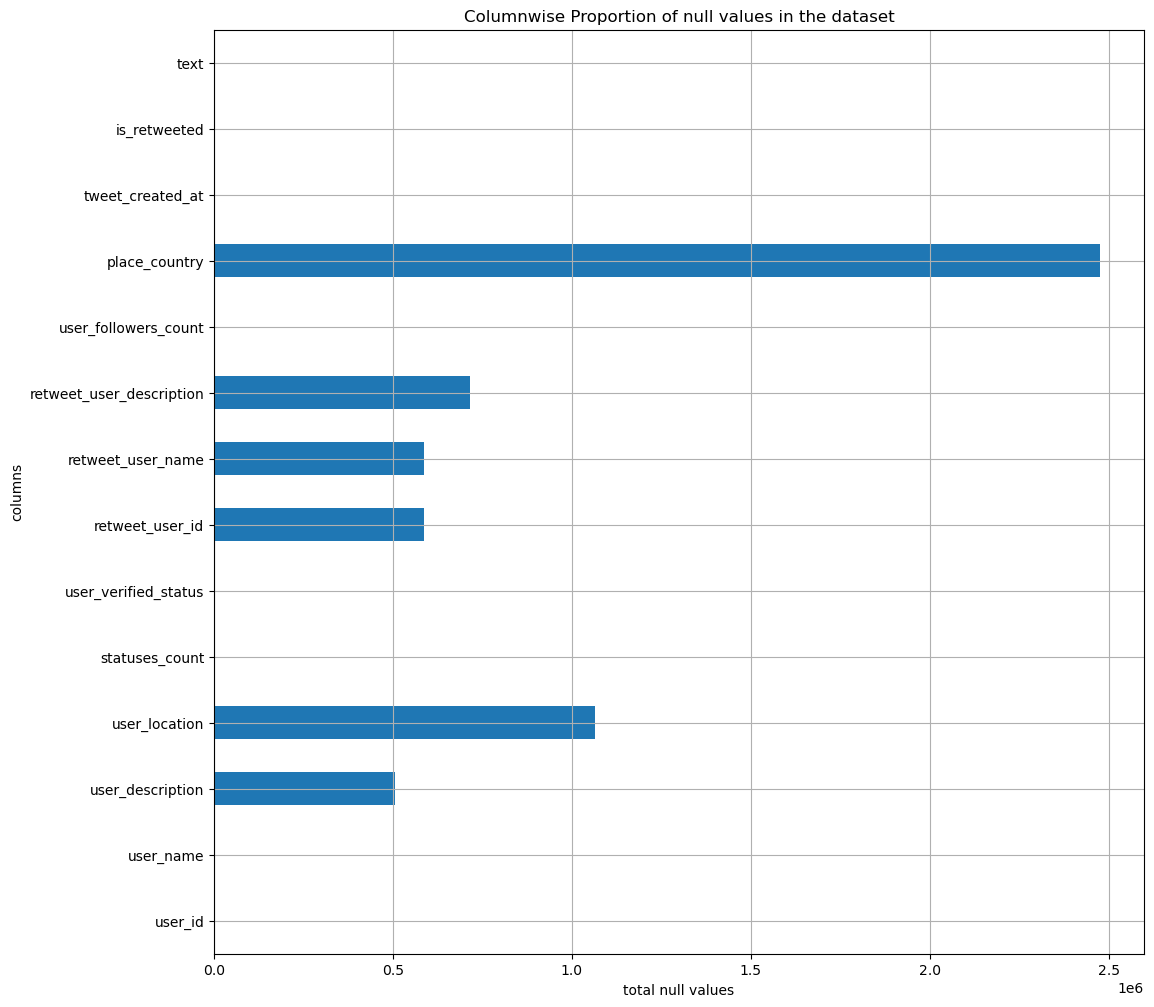

In [8]:
plt.figure(figsize = (12,12))
null_values.plot(kind='barh', title = 'Columnwise Proportion of null values in the dataset', grid=True)
plt.ylabel('columns')
plt.xlabel('total null values')

In [9]:
eda.info

<bound method DataFrame.info of                      user_id                        user_name  \
0                 1858565390                     Jenny Ardley   
1         872599455324815360                            JABE🍀   
2                 1607590819                            σοφία   
3                 3435544221                     Inspector XL   
4         886571186506801156                       Manish Rai   
...                      ...                              ...   
2503413  1057999318408261635        BEROZGAR MUJAHID MUFFASIR   
2503414           3371507714  maย ft.กอววันเกิดแฮชานที่พิน 🫶🏼   
2503415           1922323999                              Vio   
2503416  1322167771262709761                               지혜   
2503417             35220890               RadiantLady⁷💜ᴾʳᵒᵒᶠ   

                                                                                                                                                     user_description  \
0                 

Saving the data for next module.

In [6]:
tweets_data = df_twt_eda.sample(fraction=0.3)

In [7]:
tweets_data.write.format("parquet").\
mode('overwrite').\
save('gs://' + 'msca-bdp-students-bucket/shared_data/gsohi' + '/bdp_final_project_2.5MM')

22/12/05 23:33:25 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 7 for reason Container marked as failed: container_1670282560566_0003_01_000007 on host: hub-msca-bdp-dphub-students-backup-gsohi-sw-pc0m.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
22/12/05 23:33:25 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 7 on hub-msca-bdp-dphub-students-backup-gsohi-sw-pc0m.c.msca-bdp-students.internal: Container marked as failed: container_1670282560566_0003_01_000007 on host: hub-msca-bdp-dphub-students-backup-gsohi-sw-pc0m.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
